In [16]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Italy stat Logo



# Prepare geodataframe

In [17]:
regions_df = gpd.read_file('../datasets/limits_IT_regions.geojson')

In [18]:
regions_df

,reg_name,reg_istat_code_num,reg_istat_code,geometry
0,Piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ..."
1,Valle d'Aosta/Vallée d'Aoste,2,02,"POLYGON ((7.73455 45.92365, 7.73590 45.92744, ..."
2,Lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7..."
3,Trentino-Alto Adige/Südtirol,4,04,"POLYGON ((12.01396 46.55091, 12.01376 46.55077..."
4,Veneto,5,05,"POLYGON ((10.63538 45.53543, 10.63228 45.56846..."
5,Friuli-Venezia Giulia,6,06,"MULTIPOLYGON (((13.51691 46.38301, 13.51750 46..."
6,Liguria,7,07,"MULTIPOLYGON (((7.55166 43.89429, 7.56264 43.9..."
7,Emilia-Romagna,8,08,"MULTIPOLYGON (((9.33258 44.73504, 9.33167 44.7..."
8,Toscana,9,09,"MULTIPOLYGON (((9.89786 44.16359, 9.89451 44.1..."
9,Umbria,10,10,"MULTIPOLYGON (((13.15849 42.65425, 13.15764 42..."


In [19]:
regions_df['reg_name'] = regions_df['reg_name'].map(lambda x: x.lower())

In [20]:
regions_df.loc[regions_df["reg_name"] == "valle d'aosta/vallée d'aoste", "reg_name"] = "valle d'aosta"

In [21]:
regions_df.loc[regions_df["reg_name"] == "trentino-alto adige/südtirol", "reg_name"] = "trentino-alto adige"

In [22]:
regions_df['reg_name'] = regions_df['reg_name'].map(lambda x: x.replace("-", " "))

In [23]:
regions_df['reg_name']

0                  piemonte
1             valle d'aosta
2                 lombardia
3       trentino alto adige
4                    veneto
5     friuli venezia giulia
6                   liguria
7            emilia romagna
8                   toscana
9                    umbria
10                   marche
11                    lazio
12                  abruzzo
13                   molise
14                 campania
15                   puglia
16               basilicata
17                 calabria
18                  sicilia
19                 sardegna
Name: reg_name, dtype: object

In [24]:
def set_zone(row):
    if int(row["reg_istat_code_num"]) <= 7:
        return "Nord"
    elif int(row["reg_istat_code_num"]) >= 14:
        return "Sud e Isole"
    else:
        return "Centro"

In [25]:
regions_df["zone"] = regions_df.apply(set_zone, axis=1)

In [26]:
regions_df

,reg_name,reg_istat_code_num,reg_istat_code,geometry,zone
0,piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",Nord
1,valle d'aosta,2,02,"POLYGON ((7.73455 45.92365, 7.73590 45.92744, ...",Nord
2,lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7...",Nord
3,trentino alto adige,4,04,"POLYGON ((12.01396 46.55091, 12.01376 46.55077...",Nord
4,veneto,5,05,"POLYGON ((10.63538 45.53543, 10.63228 45.56846...",Nord
5,friuli venezia giulia,6,06,"MULTIPOLYGON (((13.51691 46.38301, 13.51750 46...",Nord
6,liguria,7,07,"MULTIPOLYGON (((7.55166 43.89429, 7.56264 43.9...",Nord
7,emilia romagna,8,08,"MULTIPOLYGON (((9.33258 44.73504, 9.33167 44.7...",Centro
8,toscana,9,09,"MULTIPOLYGON (((9.89786 44.16359, 9.89451 44.1...",Centro
9,umbria,10,10,"MULTIPOLYGON (((13.15849 42.65425, 13.15764 42...",Centro


In [27]:
region_colours = {
    "Nord": "#006900", 
    "Centro": "#FFFFFF",
    "Sud e Isole": "#980000",
}

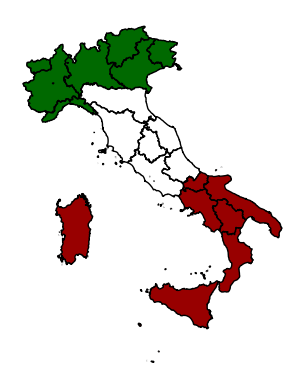

In [28]:
regions_df_plot = regions_df.plot(
    color=regions_df["zone"].replace(region_colours).tolist(),
    edgecolor='black'
)
regions_df_plot.set_axis_off()

In [29]:
regions_df_plot.get_figure().savefig('output/logo.png')
